In [105]:
import sys
import sys
sys.path.append("../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import importlib
importlib.reload(ApRESDefs)

<module 'ApRESDefs' from '/home/jovyan/xapres_package/notebooks/test_notes/../../xapres_package/ApRESDefs.py'>

In [106]:
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    20:42:57 	 ApRESDefs.py @function _setup_logging line 494 - Stream logging level set to DEBUG
DEBUG    20:42:57 	 ApRESDefs.py @function _setup_logging line 495 - Add console handler to logger
DEBUG    20:42:57 	 ApRESDefs.py @function _setup_logging line 508 - File logging level set to DEBUG


In [107]:
def reload(site):
    filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/{site}'
    ds = xr.open_dataset(filename,
        engine='zarr', 
        chunks={}) 
    return ds

ds_101 = reload("A101")
ds_103 = reload("A103_fixed")
ds_104 = reload("A104")


In [109]:
ds_103.time

<xarray.DataArray 'time' (time: 11763)>
array(['2022-02-17T16:37:49.000000000', '2022-02-17T16:40:10.000000000',
       '2022-02-17T16:55:04.000000000', ..., '2022-09-25T10:56:12.000000000',
       '2022-09-25T11:11:12.000000000', '2022-09-25T11:26:14.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    burst_number  (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    filename      (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
  * time          (time) datetime64[ns] 2022-02-17T16:37:49 ... 2022-09-25T11...
Attributes:
    long_name:  time of burst

In [4]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:38275")
client

<Client: 'tcp://127.0.0.1:38275' processes=4 threads=16, memory=58.87 GiB>

Figuring out A103

In [35]:
ds_103

<xarray.Dataset>
Dimensions:          (attenuator_setting_pair: 2, time: 11763,
                      chirp_time: 40001, chirp_num: 20, profile_range: 6658)
Coordinates:
    AFGain           (attenuator_setting_pair) int64 dask.array<chunksize=(2,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    burst_number     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename         (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * time             (time) datetime64[ns] 2022-02-17T16:37:49 ... 2022-09-25...
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(20, 40001, 20, 2), meta=np.ndarray>
    latitude         (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    longitude        (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 20, 2), meta=np.ndarray>
    profile_stacked  (time, profile_range, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 2), meta=np.ndarray>
    temperature_1    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    temperature_2    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>

Basically within each file, it assigns the same timestamp as the file. This is not the case for A101 or A104 however.

In [17]:
xa.load_all(directory='gs://ldeo-glaciology/GL_apres_2022/A103', 
            remote_load = True,
            file_numbers_to_process=range(0,3)
           )
ds_103_from_dat = xa.data

DEBUG    19:31:56 	 ApRESDefs.py @function list_files line 165 - Find all the dat files in the directory gs://ldeo-glaciology/GL_apres_2022/A103 with remote_load = True
DEBUG    19:31:56 	 ApRESDefs.py @function list_files line 179 - Finish call to list_files. Found 131 files
DEBUG    19:31:56 	 ApRESDefs.py @function load_all line 211 - Subset files to range(0, 3)
DEBUG    19:31:56 	 ApRESDefs.py @function load_all line 227 - Starting loop over dat files
DEBUG    19:31:56 	 ApRESDefs.py @function load_all line 230 - Load dat file ldeo-glaciology/GL_apres_2022/A103/CardA/DIR2022-02-17-1637/DATA2022-02-17-1637.DAT
DEBUG    19:31:56 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 259 - This dat file has 1 bursts.
DEBUG    19:31:56 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 260 - bursts_to_process = All at the start of _all_bursts_in_dat_to_xarray.
DEBUG    19:31:56 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 264 - bursts_to_process set to "All"
D

In [19]:
ds_103_from_dat.time

<xarray.DataArray 'time' (time: 16)>
array(['2022-02-17T16:37:49.000000000', '2022-02-17T16:40:10.000000000',
       '2022-02-17T16:55:04.000000000', '2022-02-17T17:10:04.000000000',
       '2022-02-17T17:25:04.000000000', '2022-02-17T17:40:04.000000000',
       '2022-02-17T17:55:04.000000000', '2022-02-17T18:10:04.000000000',
       '2022-02-17T18:25:04.000000000', '2022-02-17T18:40:04.000000000',
       '2022-02-17T18:55:04.000000000', '2022-02-17T19:10:04.000000000',
       '2022-02-17T19:25:04.000000000', '2022-03-04T15:55:30.000000000',
       '2022-03-04T16:10:06.000000000', '2022-03-04T16:25:19.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time          (time) datetime64[ns] 2022-02-17T16:37:49 ... 2022-03-04T16...
    filename      (time) <U83 'ldeo-glaciology/GL_apres_2022/A103/CardA/DIR20...
    burst_number  (time) int64 0 0 1 2 3 4 5 6 7 8 9 10 11 0 1 2
Attributes:
    long_name:  time of burst

It looks like it reads fine from the dats directly. So something happens in between loading them in and converting them to zarr

In [26]:
ds = xr.open_mfdataset(f'gs://ldeo-glaciology/apres/greenland/2022/A103/individual_zarrs_prechunked_3/dat_*',
                               chunks = {}, 
                               engine = 'zarr', 
                               consolidated = False, 
                               parallel = True)

In [68]:
ds

<xarray.Dataset>
Dimensions:          (attenuator_setting_pair: 2, time: 11763,
                      chirp_time: 40001, chirp_num: 20, profile_range: 6658)
Coordinates:
    AFGain           (attenuator_setting_pair) int64 dask.array<chunksize=(2,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    burst_number     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename         (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * time             (time) datetime64[ns] 2022-02-17T16:37:49 ... 2022-09-25...
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(1, 40001, 20, 2), meta=np.ndarray>
    latitude         (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    longitude        (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) complex128 dask.array<chunksize=(1, 6658, 20, 2), meta=np.ndarray>
    temperature_1    (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    temperature_2    (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>

Reads fine from the file `gs://ldeo-glaciology/apres/greenland/2022/A103/individual_zarrs_prechunked_3/dat_*`, which is where `write_big_zarrs` loads it. How are A101 and A104 fine?

In [94]:
ds = xr.open_mfdataset(f'gs://ldeo-glaciology/apres/greenland/2022/A103/individual_zarrs_prechunked_3/dat_*',
                               chunks = {}, 
                               engine = 'zarr', 
                               consolidated = False, 
                               parallel = True)

In [77]:
ds_101.time.encoding

{'chunks': (13,),
 'preferred_chunks': {'time': 13},
 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0),
 'filters': None,
 'units': 'seconds since 2022-05-22 19:40:20',
 'calendar': 'proleptic_gregorian',
 'dtype': dtype('int64')}

In [95]:
ds['attenuator'] = ds.attenuator[500]
ds['AFGain'] = ds.AFGain[500]

for var in ds:
    del ds[var].encoding['chunks']
ds.time.encoding['chunks'] = (13,)
ds.time.encoding['preferred_chunks'] = {'time': 13}
ds.time.encoding['units']='seconds since 2022-02-17 16:37:49'
profile_stacked = ds.profile.mean(dim='chirp_num')
ds_stacked = ds.assign({'profile_stacked':profile_stacked})
ds_stacked_rechunked = ds_stacked.chunk({'time':20})

In [96]:
test = ds_stacked_rechunked.isel(time=range(0,200))

In [97]:
test.time.encoding

{'chunks': (13,),
 'preferred_chunks': {'time': 13},
 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0),
 'filters': None,
 'units': 'seconds since 2022-02-17 16:37:49',
 'calendar': 'proleptic_gregorian',
 'dtype': dtype('int64')}

In [98]:
import numpy as np
from dask.distributed import performance_report
import xarray as xr
import fsspec
import json

with open('../../secrets/ldeo-glaciology-bc97b12df06b.json') as token_file:
    token = json.load(token_file)

In [ ]:
filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/A103_fixed' 
mapper = fsspec.get_mapper(filename, mode='w', token=token) 
with performance_report(f'test.html'):
    ds_stacked_rechunked.to_zarr(mapper, consolidated=True, safe_chunks=False)

In [101]:
def reload(site):
    filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/{site}_test4'
    ds = xr.open_dataset(filename,
        engine='zarr', 
        consolidated=True, 
        chunks={}) 
    return ds

In [102]:
ds_103 = reload("A103")


In [103]:
ds_103

<xarray.Dataset>
Dimensions:          (attenuator_setting_pair: 2, time: 200, chirp_time: 40001,
                      chirp_num: 20, profile_range: 6658)
Coordinates:
    AFGain           (attenuator_setting_pair) int64 dask.array<chunksize=(2,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    burst_number     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename         (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * time             (time) datetime64[ns] 2022-02-17T16:37:49 ... 2022-05-28...
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(20, 40001, 20, 2), meta=np.ndarray>
    latitude         (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    longitude        (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 20, 2), meta=np.ndarray>
    profile_stacked  (time, profile_range, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 2), meta=np.ndarray>
    temperature_1    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    temperature_2    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>

In [112]:
ds_103

<xarray.Dataset>
Dimensions:          (attenuator_setting_pair: 2, time: 11763,
                      chirp_time: 40001, chirp_num: 20, profile_range: 6658)
Coordinates:
    AFGain           (attenuator_setting_pair) int64 dask.array<chunksize=(2,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    burst_number     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename         (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * time             (time) datetime64[ns] 2022-02-17T16:37:49 ... 2022-09-25...
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(20, 40001, 20, 2), meta=np.ndarray>
    latitude         (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    longitude        (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 20, 2), meta=np.ndarray>
    profile_stacked  (time, profile_range, attenuator_setting_pair) complex128 dask.array<chunksize=(20, 6658, 2), meta=np.ndarray>
    temperature_1    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>
    temperature_2    (time) float64 dask.array<chunksize=(20,), meta=np.ndarray>

# Plotting

In [15]:
ds_101_hourly = ds_101.isel(attenuator_setting_pair=1,chirp_num=range(1,19)).mean(dim='chirp_num').profile.resample(time='1H').mean(dim='time').compute()
ds_103_hourly = ds_103.isel(attenuator_setting_pair=1,chirp_num=range(1,19)).mean(dim='chirp_num').profile.resample(time='1H').mean(dim='time').compute()
ds_104_hourly = ds_104.isel(attenuator_setting_pair=0,chirp_num=range(1,19)).mean(dim='chirp_num').profile.resample(time='1H').mean(dim='time').compute()


Trim to months of June-July. Select 3 hour intervals for space.

In [56]:
date_range = xr.date_range('2022-06-01T12:00:00.000000000','2022-07-30T12:00:00.000000000',freq='3H')

ds_101_resample = ds_101.sel(time=date_range,method='nearest')
ds_103_resample = ds_103.sel(time=date_range,method='nearest')
ds_104_resample = ds_104.sel(time=date_range,method='nearest')


/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/coding/cftime_offsets.py:1134: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  return pd.date_range(


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

TypeError: Axes.hist() got multiple values for argument 'x'

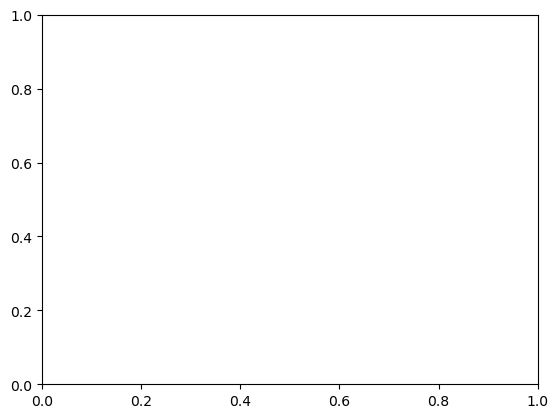

In [31]:
xa.dB(ds_103.profile_stacked).plot(x='time',cmap='plasma')
plt.gca().invert_yaxis()

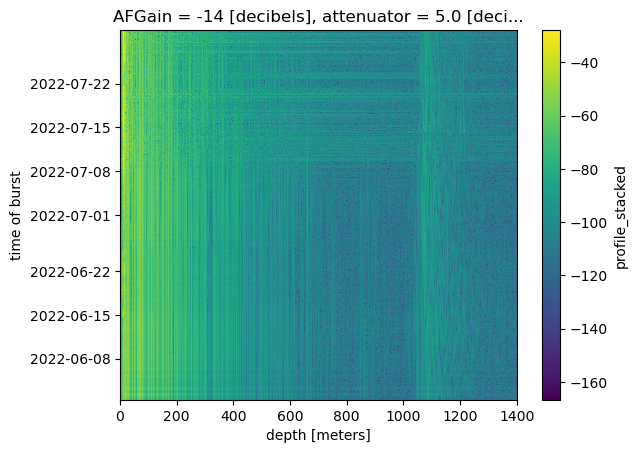

In [55]:
xa.dB(ds_101_resample.profile_stacked.isel(attenuator_setting_pair=1)).plot()

In [57]:
ds_101.time

<xarray.DataArray 'time' (time: 11723)>
array(['2022-05-22T19:40:20.000000000', '2022-05-22T19:54:54.000000000',
       '2022-05-22T20:09:53.000000000', ..., '2022-09-25T13:50:49.000000000',
       '2022-09-25T14:05:43.000000000', '2022-09-25T14:20:39.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    burst_number  (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    filename      (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
  * time          (time) datetime64[ns] 2022-05-22T19:40:20 ... 2022-09-25T14...
Attributes:
    long_name:  time of burst

In [71]:
ds_103.drop_duplicates(dim='time')

<xarray.Dataset>
Dimensions:          (attenuator_setting_pair: 2, time: 127, chirp_time: 40001,
                      chirp_num: 20, profile_range: 6658)
Coordinates:
    AFGain           (attenuator_setting_pair) int64 dask.array<chunksize=(2,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    burst_number     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename         (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * time             (time) datetime64[ns] 2022-02-17T16:37:49 ... 2022-09-25...
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  (time) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(3, 40001, 20, 2), meta=np.ndarray>
    latitude         (time) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    longitude        (time) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(3, 6658, 20, 2), meta=np.ndarray>
    profile_stacked  (time, profile_range, attenuator_setting_pair) float64 dask.array<chunksize=(3, 6658, 2), meta=np.ndarray>
    temperature_1    (time) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    temperature_2    (time) float64 dask.array<chunksize=(3,), meta=np.ndarray>